# Deep Learning Basic K-Class Classification: Clothing Image Classification

This [guide](https://www.tensorflow.org/tutorials/keras/classification) trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow. This notebook I cover
- **Environment Initiation** I start every data science project or machine learning practice by initiating environment and importing the required Python modules.
- **Data Collection and Cleanup** Then I load the data and process the data in a form that is appropriate for the machine.
- **Architecture Design** The major part is to design a deep learning architecture. One can always start from vanilla model and then add in different functions.
- **Performance Evaluation** Machine learning has to be properly carried out through training and testing. This is the part where performance evaluation is very important because it tells us whether to re-design the architecture or to move on to developmental phase.
- **Software Development / Product Management** Every data science or machine learning practice I land on software development. I almost always soft code and attempt to pack all that is scalable into a product for potential future usage.

## Environment Initiation

Let us import all the required modules.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


## Data Collection and Cleanup

Let us get the data and make sure the data is processed and ready to go.

Import the Fashion MNIST dataset:

This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:
![](../figs/fashion-mnist-sprite.png)

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

The *train_images* and *train_labels* arrays are the training set—the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.
- The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

| Label | Class |
| ---------- | ---------- |
| 0	| T-shirt/top |
| 1	| Trouser |
| 2	| Pullover |
| 3	| Dress |
| 4	| Coat |
| 5	| Sandal |
| 6	| Shirt |
| 7	| Sneaker |
| 8	| Bag |
| 9	| Ankle boot |

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [5]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

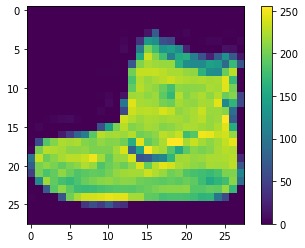

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

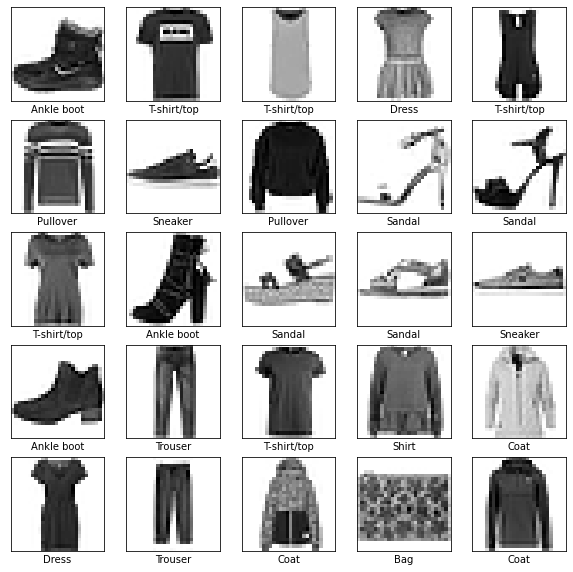

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Architecture Design

Let us design the architecture! The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as *tf.keras.layers.Dense*, have parameters that are learned during training.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 437us/step - loss: 0.4974 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 1s 460us/step - loss: 0.3730 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 1s 460us/step - loss: 0.3349 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 1s 461us/step - loss: 0.3124 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 1s 465us/step - loss: 0.2944 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 1s 450us/step - loss: 0.2812 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 1s 435us/step - loss: 0.2687 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 1s 439us/step - loss: 0.2581 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 1s 429us/step - loss: 0.2474 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 1s 438u

## Performance Evaluation

Let us check out the performance by computing 10-class classification accuracy.

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3474 - accuracy: 0.8820

Test accuracy: 0.8820000290870667


## Predictions

Let us check out a few images and see what they look like and if they are performed well.

In [13]:
predictions = model.predict(test_images)
predictions[0]

array([2.3804785e-06, 1.9508801e-09, 1.0983020e-07, 6.3293737e-15,
       3.8115978e-08, 1.4649049e-02, 3.8981284e-07, 8.3213160e-03,
       1.2501288e-09, 9.7702676e-01], dtype=float32)

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

confusion = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
pd.DataFrame(confusion)

0    1    2    3    4    5    6    7    8    9
0  873    0   12   32    3    4   75    0    1    0
1    2  971    2   20    1    0    3    0    1    0
2   16    1  870   18   59    0   36    0    0    0
3   21    4   10  915   28    1   18    0    3    0
4    0    1  156   40  770    0   32    0    1    0
5    0    0    0    0    0  969    0   15    2   14
6  160    2  127   38   84    1  583    0    5    0
7    0    0    0    0    0   21    0  966    0   13
8    7    0    3    6    6    3   13    4  958    0
9    0    0    0    0    0   12    1   42    0  945

Notice that in the architecture the last dense layer has 10 nodes. This means that we need to check the largest value from the nodes to determine which class it is classified in.

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

So we did it correctly! 

We can code a function to check out the performance for each image.

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

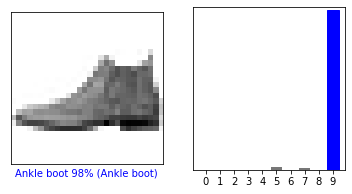

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

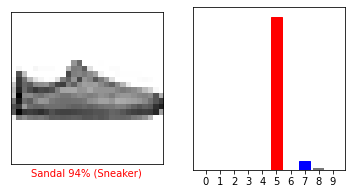

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

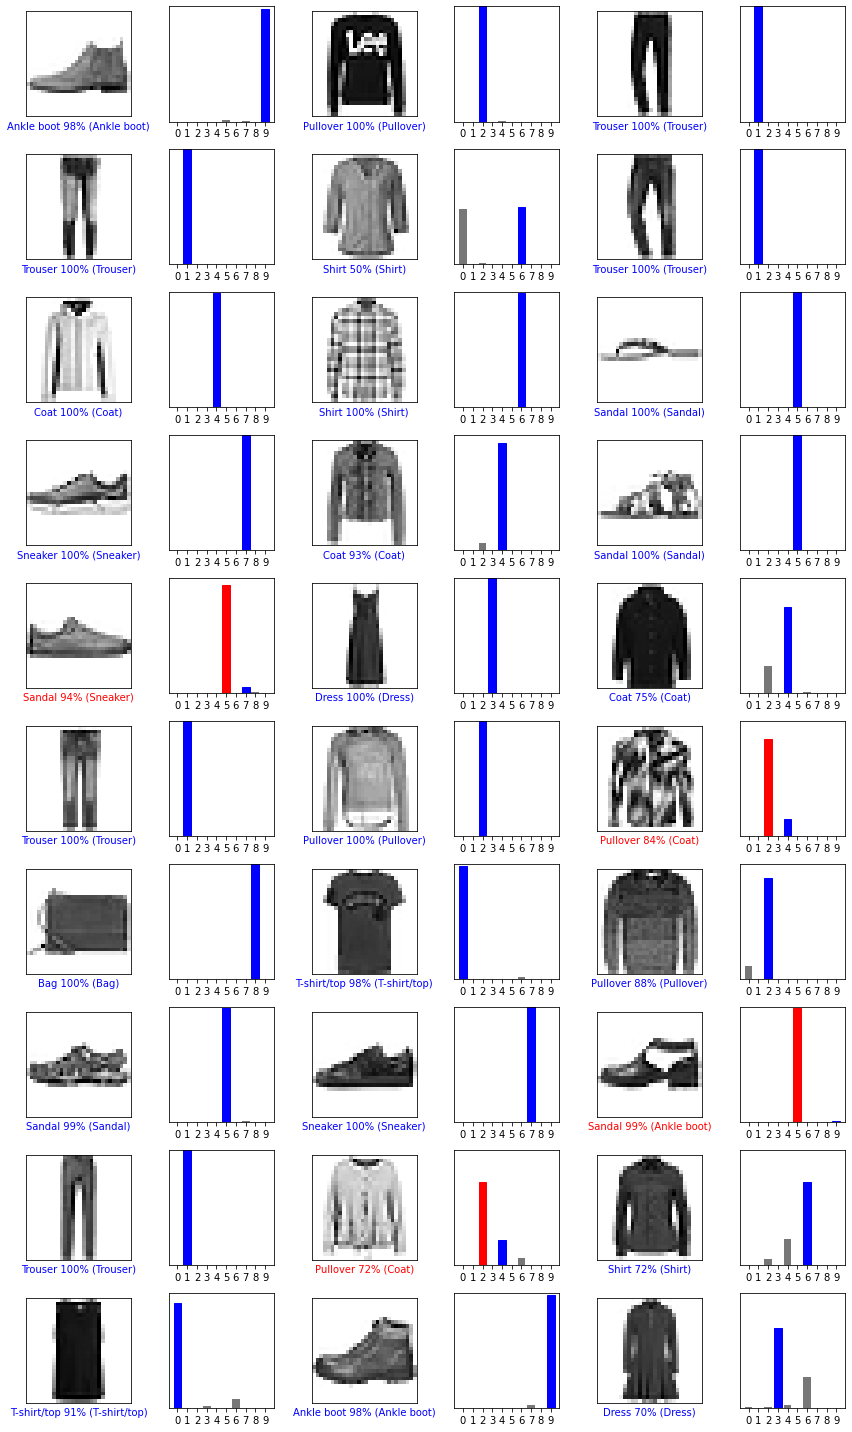

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Software Development

Every data science project has two phases. Phase I is about end-to-end research and select the most optimal machine learning procedure. Phase II is about delivering a software product to consumer and clients so that the python codes can be called and there is no need to redo everything that has already been done.

In [21]:
# Define function
def DL_NN_Classification(train_images, train_labels, test_images, test_labels, 
                         shape_width=28, shape_height=28,
                         l1_act='relu', l2_act='relu', l3_act='softmax',
                         layer1size=128, layer2size=64, layer3size=10,
                         num_rows = 10, num_cols = 3):
    """ Code Starts Here"""
    # TensorFlow and tf.keras
    import tensorflow as tf
    from tensorflow import keras

    # Helper libraries
    import numpy as np
    import matplotlib.pyplot as plt

    print(tf.__version__)
    
    # Normalize
    train_images = train_images / float(shape_width * shape_height)
    test_images = test_images / float(shape_width * shape_height)

    # Model
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(shape_width, shape_height)),
    keras.layers.Dense(layer1size, activation=l1_act),
    keras.layers.Dense(layer2size, activation=l2_act),        
    keras.layers.Dense(layer3size, activation=l3_act) ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    model.fit(train_images, train_labels, epochs=10)
    
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    
    # Prediction
    predictions = model.predict(test_images)

    # Performance
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import pandas as pd
    confusion = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
    confusion = pd.DataFrame(confusion)
    
    # Visualization
    def plot_image(i, predictions_array, true_label, img):
      predictions_array, true_label, img = predictions_array, true_label[i], img[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])

      plt.imshow(img, cmap=plt.cm.binary)

      predicted_label = np.argmax(predictions_array)
      if predicted_label == true_label:
        color = 'blue'
      else:
        color = 'red'

      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

    def plot_value_array(i, predictions_array, true_label):
      predictions_array, true_label = predictions_array, true_label[i]
      plt.grid(False)
      plt.xticks(range(layer3size))
      plt.yticks([])
      thisplot = plt.bar(range(layer3size), predictions_array, color="#777777")
      plt.ylim([0, 1])
      predicted_label = np.argmax(predictions_array)

      thisplot[predicted_label].set_color('red')
      thisplot[true_label].set_color('blue')
    
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()
    """ Code Ends Here"""
    
    # Output
    return {
        'Data': [train_images, train_labels, test_images, test_labels],
        'Shape': [train_images.shape, len(train_labels), test_images.shape, len(test_labels)],
        'Model Fitting': model,
        'Performance': {
            'test_loss': test_loss, 
            'test_acc': test_acc, 
            'confusion': confusion
        },
    }
# End of function

We have the product coded! Let us try it out.

2.3.1
Epoch 1/10
1875/1875 [==============================] - 1s 470us/step - loss: 1.1161 - accuracy: 0.5892
Epoch 2/10
1875/1875 [==============================] - 1s 471us/step - loss: 0.6966 - accuracy: 0.7439
Epoch 3/10
1875/1875 [==============================] - 1s 471us/step - loss: 0.6165 - accuracy: 0.7733
Epoch 4/10
1875/1875 [==============================] - 1s 484us/step - loss: 0.5790 - accuracy: 0.7907
Epoch 5/10
1875/1875 [==============================] - 1s 509us/step - loss: 0.5523 - accuracy: 0.8015
Epoch 6/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.5320 - accuracy: 0.8097
Epoch 7/10
1875/1875 [==============================] - 1s 506us/step - loss: 0.5137 - accuracy: 0.8172
Epoch 8/10
1875/1875 [==============================] - 1s 475us/step - loss: 0.4975 - accuracy: 0.8228
Epoch 9/10
1875/1875 [==============================] - 1s 474us/step - loss: 0.4833 - accuracy: 0.8280
Epoch 10/10
1875/1875 [==============================] - 1

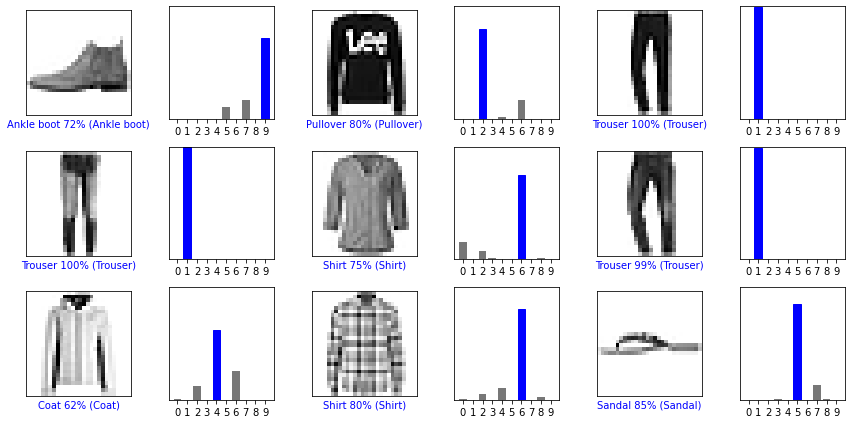

In [22]:
testresult = DL_NN_Classification(
    train_images, train_labels, test_images, test_labels, 
    #shape_width=28, shape_height=28,
    l1_act='relu', l2_act='relu', l3_act='softmax',
    layer1size=128, layer2size=64, layer3size=10,
    num_rows = 3, num_cols = 3)

In [23]:
fitted_model = testresult['Model Fitting']
fitted_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [24]:
testresult['Performance']['confusion']

0    1    2    3    4    5    6    7    8    9
0  808    3    5   46    2    4  114    0   18    0
1    1  950   10   27    4    0    6    0    2    0
2   24    2  720    7  100    1  141    0    5    0
3   67   14    7  801   29    0   73    0    9    0
4    0    2  133   30  655    0  172    0    8    0
5    0    0    0    1    0  909    0   48    4   38
6  170    2  100   25   71    1  605    0   26    0
7    0    0    0    0    0   48    0  893    0   59
8    3    1    4    9    2   10   32    3  934    2
9    0    0    0    0    0   22    0   36    1  941

In [25]:
testresult['Performance']['test_acc']

0.8216000199317932

Let us code an even more general function.

In [26]:
# Define function
def DL_NN_Classification(X_train, y_train, X_test, y_test, 
                         l1_act='relu', l2_act='relu', l3_act='softmax',
                         layer1size=128, layer2size=64, layer3size=2,
                         num_of_epochs=10):
    
    """ Code Starts Here"""
    # TensorFlow and tf.keras
    import tensorflow as tf
    from tensorflow import keras

    # Helper libraries
    import numpy as np
    import matplotlib.pyplot as plt

    print(tf.__version__)
    
    # Normalize
    # Helper Function
    def helpNormalize(X):
        return (X - X.mean()) / np.std(X)
    
    X_train = X_train.apply(helpNormalize, axis=1)
    X_test = X_test.apply(helpNormalize, axis=1)

    # Model
    model = tf.keras.Sequential([
        keras.layers.Dense(units=layer1size, input_shape=[X_train.shape[1]]),
        keras.layers.Dense(units=layer2size, activation=l2_act),
        keras.layers.Dense(units=layer3size, activation=l3_act)
    ])
    
    # Compile
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Model Fitting
    model.fit(X_train, y_train, epochs=num_of_epochs)
    
    # Prediction
    predictions = model.predict(X_test)

    # Performance
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import pandas as pd
    confusion = confusion_matrix(y_test, np.argmax(predictions, axis=1))
    confusion = pd.DataFrame(confusion)
    test_acc = sum(np.diag(confusion)) / sum(sum(np.array(confusion)))
    """ Code Ends Here"""
    
    # Output
    return {
        'Data': [train_images, train_labels, test_images, test_labels],
        'Shape': [train_images.shape, len(train_labels), test_images.shape, len(test_labels)],
        'Model Fitting': model,
        'Performance': {
            'test_loss': test_loss, 
            'test_acc': test_acc, 
            'confusion': confusion
        },
    }
# End of function

Let us try a different data set.

In [27]:
house_sales = pd.read_csv('../data/kc_house_data.csv')
house_sales.head(3)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   

   sqft_lot15  
0        5650  
1        7639  
2        8062  

[3 rows x 21 columns]

In [28]:
house_sales = house_sales.drop(['id', 'zipcode', 'lat', 'long', 'date'], axis=1)
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


In [29]:
X_all = house_sales.drop('price', axis=1)
y = np.log(house_sales.price)
y_binary = (y > y.mean()).astype(int)
y_binary

0        0
1        1
2        0
3        1
4        1
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: price, Length: 21613, dtype: int32

In [30]:
X_all.head(3), y_binary.head(3)

(   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 0         3       1.00         1180      5650     1.0           0     0   
 1         3       2.25         2570      7242     2.0           0     0   
 2         2       1.00          770     10000     1.0           0     0   
 
    condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
 0          3      7        1180              0      1955             0   
 1          3      7        2170            400      1951          1991   
 2          3      6         770              0      1933             0   
 
    sqft_living15  sqft_lot15  
 0           1340        5650  
 1           1690        7639  
 2           2720        8062  ,
 0    0
 1    1
 2    0
 Name: price, dtype: int32)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_binary, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train)

(15129, 15) (6484, 15)
1468     0
15590    0
18552    1
10535    0
1069     1
        ..
13123    1
19648    0
9845     0
10799    0
2732     1
Name: price, Length: 15129, dtype: int32


In [33]:
testresult = DL_NN_Classification(X_train, y_train, X_test, y_test, 
                         l1_act='relu', l2_act='relu', l3_act='softmax',
                         layer1size=128, layer2size=64, layer3size=2,
                         num_of_epochs=50)

2.3.1
Epoch 1/50
473/473 [==============================] - 0s 373us/step - loss: 0.5521 - accuracy: 0.7115
Epoch 2/50
473/473 [==============================] - 0s 369us/step - loss: 0.4964 - accuracy: 0.7457
Epoch 3/50
473/473 [==============================] - 0s 371us/step - loss: 0.4890 - accuracy: 0.7527
Epoch 4/50
473/473 [==============================] - 0s 369us/step - loss: 0.4808 - accuracy: 0.7584
Epoch 5/50
473/473 [==============================] - 0s 377us/step - loss: 0.4771 - accuracy: 0.7591
Epoch 6/50
473/473 [==============================] - 0s 369us/step - loss: 0.4766 - accuracy: 0.7613
Epoch 7/50
473/473 [==============================] - 0s 369us/step - loss: 0.4728 - accuracy: 0.7639
Epoch 8/50
473/473 [==============================] - 0s 369us/step - loss: 0.4716 - accuracy: 0.7628
Epoch 9/50
473/473 [==============================] - 0s 367us/step - loss: 0.4710 - accuracy: 0.7642
Epoch 10/50
473/473 [==============================] - 0s 371us/step - loss:

In [34]:
testresult['Performance']['confusion']

0     1
0  2834   581
1   865  2204

In [35]:
testresult['Performance']['test_acc']

0.7769895126465145